About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





In [1]:
#installing all the required libraries
# !pip install numpy pandas nltk scikit-learn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Loading the dataset

In [33]:
df = pd.read_csv("../datasets/train.csv", sep=';', engine='python', encoding='utf-8', on_bad_lines='skip')

print("Dataset Shape:", df.shape)
df.info()
df.head()
df.describe()

Dataset Shape: (24353, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      24353 non-null  int64 
 1   title   24353 non-null  object
 2   text    24353 non-null  object
 3   label   24353 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 761.2+ KB


,id,label
count,24353.000000,24353.000000
mean,12176.000000,0.543917
std,7030.249889,0.498078
min,0.000000,0.000000
25%,6088.000000,0.000000
50%,12176.000000,1.000000
75%,18264.000000,1.000000
max,24352.000000,1.000000


Missing Values per Column:
id       0
title    0
text     0
label    0
dtype: int64


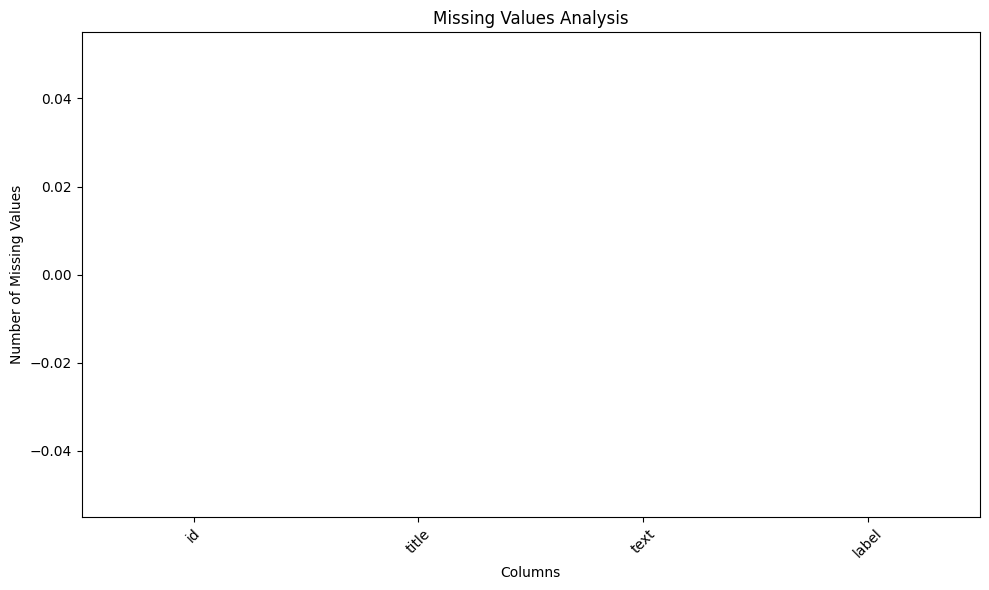


Data Types:
id        int64
title    object
text     object
label     int64
dtype: object

Memory Usage:
Index         132
id         194824
title     3736239
text     79411496
label      194824
dtype: int64


In [3]:
print("Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind="bar", color="skyblue")
plt.title("Missing Values Analysis")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check data types and memory usage
print("\nData Types:")
print(df.dtypes)
print("\nMemory Usage:")
print(df.memory_usage(deep=True))

/tmp/ipykernel_93652/3038503380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette=["lightblue", "lightcoral"])


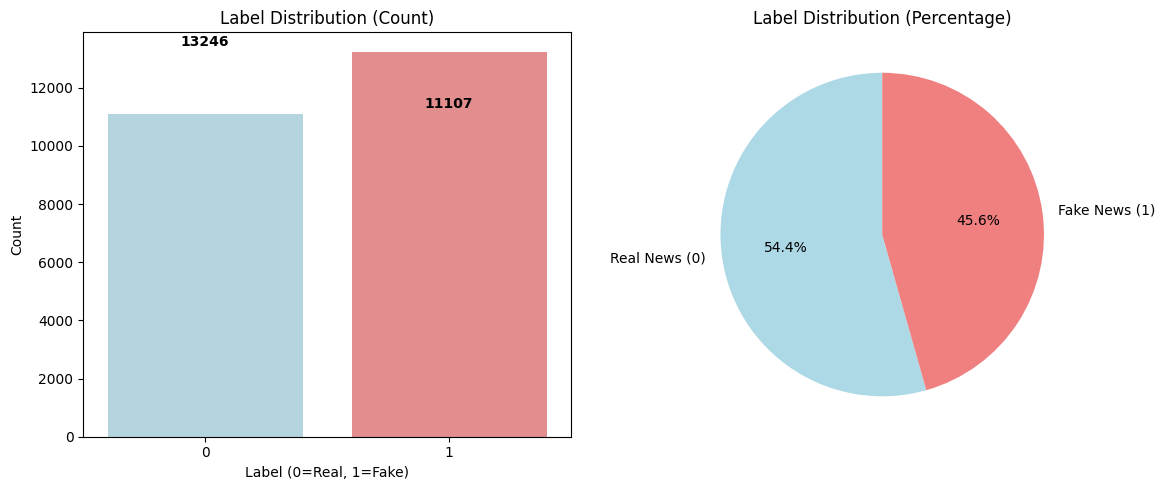


Label Distribution Details:
Real News (0): 11,107 articles (45.6%)
Fake News (1): 13,246 articles (54.4%)
Total Articles: 24,353


In [4]:
plt.figure(figsize=(12, 5))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
label_counts = df["label"].value_counts()
sns.countplot(data=df, x="label", palette=["lightblue", "lightcoral"])
plt.title("Label Distribution (Count)")
plt.xlabel("Label (0=Real, 1=Fake)")
plt.ylabel("Count")

# Add count labels on bars
for i, count in enumerate(label_counts.values):
    plt.text(i, count + 100, str(count), ha="center", va="bottom", fontweight="bold")

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
labels = ["Real News (0)", "Fake News (1)"]
colors = ["lightblue", "lightcoral"]
plt.pie(label_counts.values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Label Distribution (Percentage)")

plt.tight_layout()
plt.show()

# Print exact numbers
print("\nLabel Distribution Details:")
print(f"Real News (0): {label_counts[0]:,} articles ({label_counts[0]/len(df)*100:.1f}%)")
print(f"Fake News (1): {label_counts[1]:,} articles ({label_counts[1]/len(df)*100:.1f}%)")
print(f"Total Articles: {len(df):,}")

In [5]:
#droping the extra column
df = df.drop("id", axis=1)

In [6]:
df

,title,text,label
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0
...,...,...,...
24348,Mexico Senate committee OK's air transport dea...,MEXICO CITY (Reuters) - A key committee in Mex...,1
24349,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,0
24350,trump breaks from stump speech to admire beaut...,kremlin nato was created for agression \r\nru...,0
24351,NFL PLAYER Delivers Courageous Message: Stop B...,Dallas Cowboys star wide receiver Dez Bryant t...,0


# Step 2: Data preprocessing

In [7]:
# dropping the null values
df = df.dropna()
# checking the null values
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/no0ne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Initializing the PorterStemmer for removing suffixes
ps = PorterStemmer()
# Getting the list of stopwords in English
stop_words = stopwords.words('english')

In [10]:
def preprocess_text(text):
    # Removing non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    # Stemming and removing stopwords
    processed_words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)

In [11]:
df["content"] = df["title"] + " " + df["text"]
df


,title,text,label,content
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,Palestinians switch off Christmas lights in Be...
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,China says Trump call with Taiwan president wo...
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,FAIL! The Trump Organization’s Credit Score W...
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,Zimbabwe military chief's China trip was norma...
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...
...,...,...,...,...
24348,Mexico Senate committee OK's air transport dea...,MEXICO CITY (Reuters) - A key committee in Mex...,1,Mexico Senate committee OK's air transport dea...
24349,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,0,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...
24350,trump breaks from stump speech to admire beaut...,kremlin nato was created for agression \r\nru...,0,trump breaks from stump speech to admire beaut...
24351,NFL PLAYER Delivers Courageous Message: Stop B...,Dallas Cowboys star wide receiver Dez Bryant t...,0,NFL PLAYER Delivers Courageous Message: Stop B...


In [12]:
df.shape

(24353, 4)

In [13]:
# applying the preprocess_text function
df["content"] = df["content"].apply(preprocess_text)

In [14]:
#checking the processed text
df["content"].head(10)

0    palestinian switch christma light bethlehem an...
1    china say trump call taiwan presid chang islan...
2    fail trump organ credit score make laugh contr...
3    zimbabw militari chief china trip normal visit...
4    uncourag presid ever receiv courag award proce...
5    suspect boko haram suicid bomber kill least ni...
6    watch john oliv present gop debat clowntown f ...
7    senat democrat ask trump attorney gener pick r...
8    trump humili republican latest hissi fit side ...
9    maci get boot loyal custom fire trump know pat...
Name: content, dtype: object

# Step 3: Feature Extraction

In [15]:
# # for feature extraction using TF-IDF Vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer( max_features=5000, ngram_range=(1, 3))

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( max_features=5000, ngram_range=(1, 3))

In [17]:
# in this step we will covert the text data into feature vectors
X = vectorizer.fit_transform(df["content"]).toarray()


In [18]:
Y = df["label"].values

In [19]:
vectorizer.get_feature_names_out()[:40]

array(['abadi', 'abandon', 'abba', 'abc', 'abc news', 'abdullah', 'abe',
       'abedin', 'abid', 'abil', 'abl', 'abort', 'abroad', 'absolut',
       'absurd', 'abu', 'abus', 'academ', 'accept', 'access', 'accid',
       'accident', 'accommod', 'accompani', 'accomplish', 'accord',
       'accord report', 'accord reuter', 'account', 'accur', 'accus',
       'achiev', 'acknowledg', 'aclu', 'acquir', 'acr', 'across',
       'across countri', 'act', 'act like'], dtype=object)

In [20]:
print(X.shape)
print(Y.shape)
print(type(X))

(24353, 5000)
(24353,)
<class 'numpy.ndarray'>


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(y_train)

[1 0 0 ... 1 0 0]


# Step 3: Training models
## trying logistic regression

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.9700266885649764

Detailed classification report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2226
           1       0.97      0.97      0.97      2645

    accuracy                           0.97      4871
   macro avg       0.97      0.97      0.97      4871
weighted avg       0.97      0.97      0.97      4871



## Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.9484705399301991

Detailed classification report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2226
           1       0.96      0.95      0.95      2645

    accuracy                           0.95      4871
   macro avg       0.95      0.95      0.95      4871
weighted avg       0.95      0.95      0.95      4871



## Random Forest

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=3)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9794703346335455

Detailed classification report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2226
           1       0.99      0.97      0.98      2645

    accuracy                           0.98      4871
   macro avg       0.98      0.98      0.98      4871
weighted avg       0.98      0.98      0.98      4871



## Svm

In [26]:
# using linear
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, svm_pred))

/home/no0ne/Documents/machine-learning/ML-Projects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Accuracy: 0.9595565592280846

Detailed classification report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2226
           1       0.96      0.96      0.96      2645

    accuracy                           0.96      4871
   macro avg       0.96      0.96      0.96      4871
weighted avg       0.96      0.96      0.96      4871



In [27]:
# using SVM with poly
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, svm_pred))

/home/no0ne/Documents/machine-learning/ML-Projects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Accuracy: 0.9595565592280846

Detailed classification report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2226
           1       0.96      0.96      0.96      2645

    accuracy                           0.96      4871
   macro avg       0.96      0.96      0.96      4871
weighted avg       0.96      0.96      0.96      4871



In [28]:
# using SVM with RBF kernel
model = SVC(kernel='rbf', C=2.0, gamma='scale')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, svm_pred))

/home/no0ne/Documents/machine-learning/ML-Projects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Accuracy: 0.9595565592280846

Detailed classification report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2226
           1       0.96      0.96      0.96      2645

    accuracy                           0.96      4871
   macro avg       0.96      0.96      0.96      4871
weighted avg       0.96      0.96      0.96      4871




===== Logistic Regression =====
✅ Accuracy: 0.9700

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2226
           1       0.97      0.97      0.97      2645

    accuracy                           0.97      4871
   macro avg       0.97      0.97      0.97      4871
weighted avg       0.97      0.97      0.97      4871



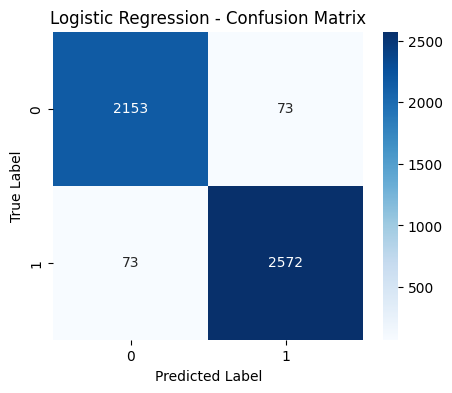


===== Naive Bayes =====
✅ Accuracy: 0.9485

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2226
           1       0.96      0.95      0.95      2645

    accuracy                           0.95      4871
   macro avg       0.95      0.95      0.95      4871
weighted avg       0.95      0.95      0.95      4871



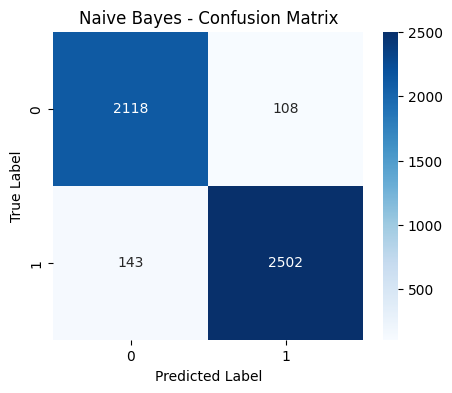


===== Random Forest =====
✅ Accuracy: 0.9813

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2226
           1       0.99      0.97      0.98      2645

    accuracy                           0.98      4871
   macro avg       0.98      0.98      0.98      4871
weighted avg       0.98      0.98      0.98      4871



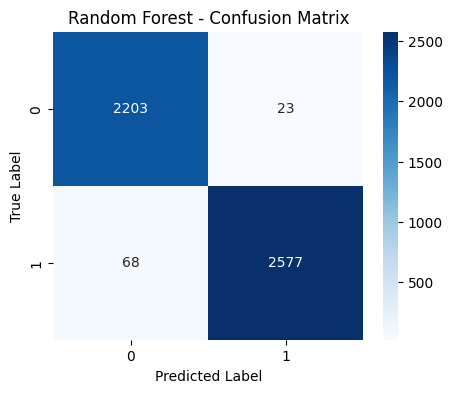

/home/no0ne/Documents/machine-learning/ML-Projects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



===== SVM (Linear) =====
✅ Accuracy: 0.9596

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2226
           1       0.96      0.96      0.96      2645

    accuracy                           0.96      4871
   macro avg       0.96      0.96      0.96      4871
weighted avg       0.96      0.96      0.96      4871



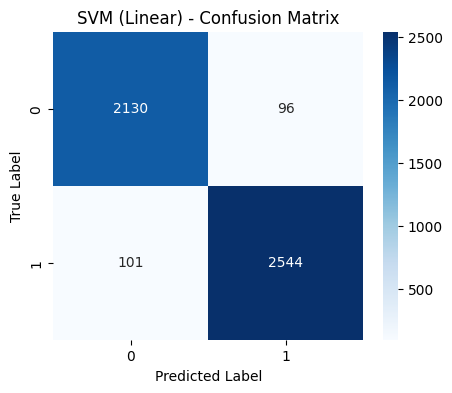

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    """Train model, print metrics, and show confusion matrix"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n===== {model_name} =====")
    print(f"✅ Accuracy: {acc:.4f}")
    print("\n🧾 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return acc

models = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (MultinomialNB(), "Naive Bayes"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (LinearSVC(), "SVM (Linear)")
]

accuracies = {}

for model, name in models:
    acc = evaluate_model(model, name, X_train, y_train, X_test, y_test)
    accuracies[name] = acc



/tmp/ipykernel_93652/2814058942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='Blues_d')
/home/no0ne/Documents/machine-learning/ML-Projects/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


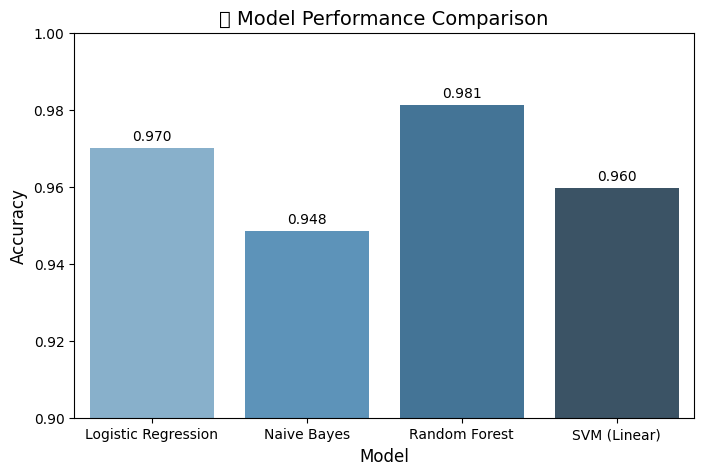

In [30]:

acc_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='Blues_d')
plt.title("📈 Model Performance Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.9, 1.0)

# Add accuracy labels on top of bars
for index, value in enumerate(acc_df['Accuracy']):
    plt.text(index, value + 0.002, f"{value:.3f}", ha='center', fontsize=10)

plt.show()

In [31]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']